In [1]:
import etchingSimulator

import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

0.2199997668696038


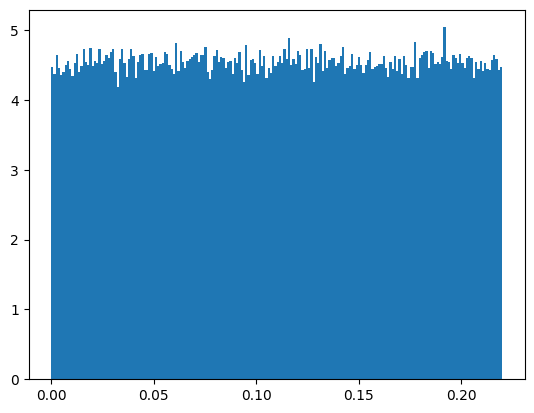

In [2]:
a = np.random.rand(int(2e5))*0.22
nptest = np.histogram(a, bins=200, range=[0, 0.22])
print(a.max())
fig, axs = plt.subplots()

dist = axs.hist(a, bins = 200, range=[0, 0.22], density=True)

distGen = dist[0]*1e3

distNorm = distGen*dist[1][1:]*2*np.pi

(631490,)


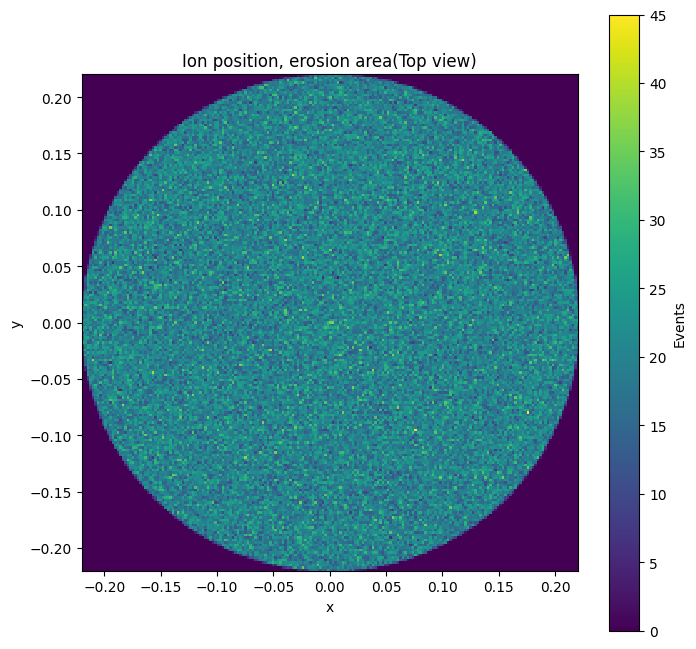

In [3]:
gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(distNorm[0][i])
    theta = np.random.rand(int(distNorm[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(distNorm[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [4]:
print(gen_dist_x.shape[0])

631490


In [5]:
test = etchingSimulator.etching(param = [1.6, -0.7], TS = 0.11, N = gen_dist_x.shape[0], sub_xy=[0,0])

In [6]:
deposit = test.runEtching(3, 125, N = gen_dist_x.shape[0])

running: 100%|██████████████████████████████████████████████████████| 100/100 [01:18<00:00, 1.28B/s]


{(0, 0, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x231a61ad3d0>,
 (0, 0, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x231b33516d0>,
 (0, 1, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x231b3351a60>,
 (0, 1, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x231b3351df0>,
 (0, 2, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f5451c0>,
 (0, 2, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f545550>,
 (0, 3, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f5458e0>,
 (0, 3, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f545c70>,
 (0, 4, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f545f70>,
 (0, 4, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f5613d0>,
 (0, 5, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f561760>,
 (0, 5, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f561af0>,
 (0, 6, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2311f561e80>,

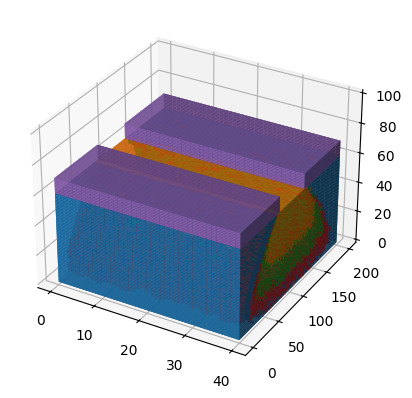

In [7]:
indice_wall = np.array(deposit[80:120,:,  :] == 10)
in_depo = np.array(deposit[80:120,:,  :] == -100)
in_depo2 = np.array(deposit[80:120,:,  :] == -200)
in_depo3 = np.array(deposit[80:120,:,  :] == -300)
in_depo4 = np.array(deposit[80:120,:,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)

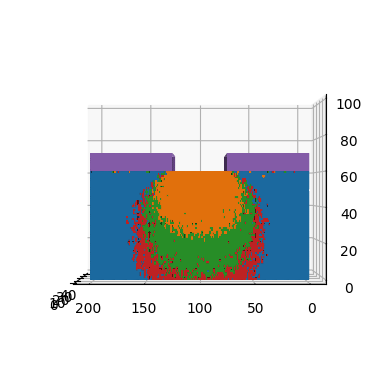

In [7]:
indice_wall = np.array(deposit[80:120,:,  :] == 10)
in_depo = np.array(deposit[80:120,:,  :] == -100)
in_depo2 = np.array(deposit[80:120,:,  :] == -200)
in_depo3 = np.array(deposit[80:120,:,  :] == -300)
in_depo4 = np.array(deposit[80:120,:,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)

ax.view_init(elev=0, azim=180, roll=0)

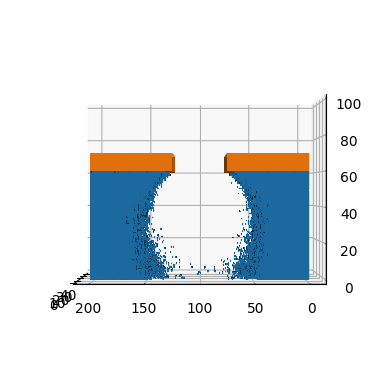

In [8]:
indice_wall = np.array(deposit[80:120,:,  :] == 10)
# in_depo = np.array(deposit[80:120,:,  :] == 100)
# in_depo2 = np.array(deposit[80:120,:,  :] == 200)
# in_depo3 = np.array(deposit[80:120,:,  :] == 300)
in_depo4 = np.array(deposit[80:120,:,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
# ax.voxels(in_depo)
# ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)

ax.view_init(elev=0, azim=180, roll=0)

{(0, 0, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c94da18ca0>,
 (0, 0, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e93b2b0>,
 (0, 1, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e93b640>,
 (0, 1, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e93b9d0>,
 (0, 2, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e93bd60>,
 (0, 2, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e94a130>,
 (0, 3, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e94a4c0>,
 (0, 3, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e94a850>,
 (0, 4, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e94abe0>,
 (0, 4, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e94af70>,
 (0, 5, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e957340>,
 (0, 5, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e9576d0>,
 (0, 6, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1c93e957a60>,

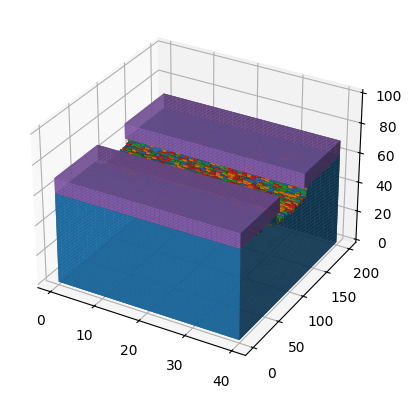

In [9]:
indice_wall = np.array(deposit[80:120,:,  :] == 10)
in_depo = np.array(deposit[80:120,:,  :] == 100)
in_depo2 = np.array(deposit[80:120,:,  :] == 200)
in_depo3 = np.array(deposit[80:120,:,  :] == 300)
in_depo4 = np.array(deposit[80:120,:,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)

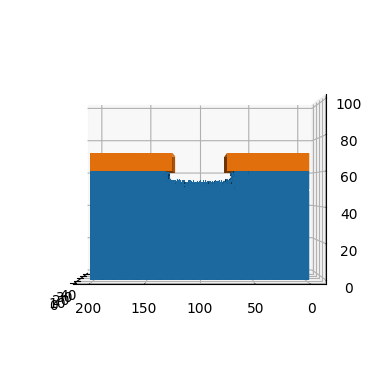

In [14]:
indice_wall = np.array(deposit[80:120,:,  :] == 10)
# in_depo = np.array(deposit[80:120,:,  :] == 100)
# in_depo2 = np.array(deposit[80:120,:,  :] == 200)
# in_depo3 = np.array(deposit[80:120,:,  :] == 300)
in_depo4 = np.array(deposit[80:120,:,  :] >= 500)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
# ax.voxels(in_depo)
# ax.voxels(in_depo2)
# ax.voxels(in_depo3)
ax.voxels(in_depo4)

ax.view_init(elev=0, azim=180, roll=0)

{(0, 0, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x235095a6190>,
 (0, 0, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x235c57a2b20>,
 (0, 1, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x235c57a2eb0>,
 (0, 1, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346912d280>,
 (0, 2, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346912d610>,
 (0, 2, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346912d9a0>,
 (0, 3, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346912dd30>,
 (0, 3, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346913d100>,
 (0, 4, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346913d490>,
 (0, 4, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346913d820>,
 (0, 5, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346913dbb0>,
 (0, 5, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346913df40>,
 (0, 6, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2346914b310>,

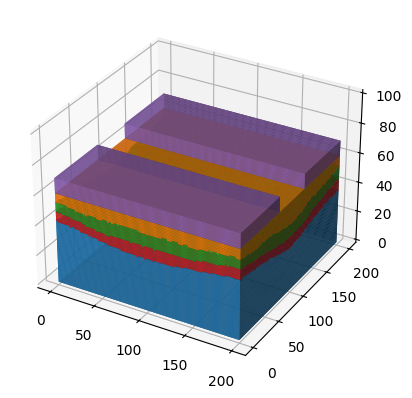

In [14]:
openWidth = 95

indice_wall = np.array(deposit == 10)
in_depo = np.array(deposit == 100)
in_depo2 = np.array(deposit == 200)
in_depo3 = np.array(deposit == 300)
in_depo4 = np.array(deposit == 1000)

# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)

# ax.view_init(elev=0, azim=90, roll=0)

In [9]:
def max_velocity_u(Cm, random1, random2):
    return Cm*np.sqrt(-np.log(random1))*np.cos(2*np.pi*random2)

def max_velocity_w(Cm, random1, random2):
    return Cm*np.sqrt(-np.log(random1))*np.sin(2*np.pi*random2)

def max_velocity_v(Cm, random3):
    return -Cm*np.sqrt(-np.log(random3))

In [10]:
T = 300
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al
print(Cm)

N = int(1e5)

Random1 = np.random.rand(N)
Random2 = np.random.rand(N)
Random3 = np.random.rand(N)

velosity_matrix = np.array([max_velocity_u(Cm, Random1, Random2), max_velocity_w(Cm, Random1, Random2), max_velocity_v(Cm, Random3)]).T

print(velosity_matrix.shape)

429.9137549323743
(100000, 3)


In [15]:
print(velosity_matrix.max())

1376.1522197642591


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\URCS_simulation team\AppData\Local\Temp\ipykernel_52816\585248000.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


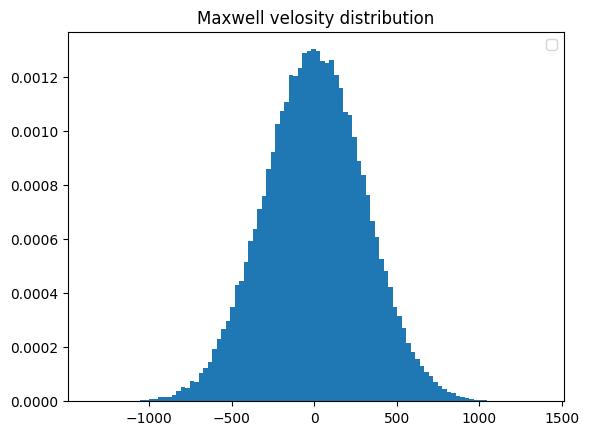

In [14]:
fig, ax = plt.subplots()
ax.set_title("Maxwell velosity distribution")
ax.hist(velosity_matrix[:, 0], density=True, bins=100)


# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()
fig.show()